<a href="https://colab.research.google.com/github/dummystine19/Translation-ML-Model/blob/main/Big_Sales_Prediction_Using_Random_Forest_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy scikit-learn matplotlib joblib


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib


In [4]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 1000

# Features
dates = pd.date_range(start='2022-01-01', periods=n_samples, freq='D')
store_ids = np.random.randint(1, 10, size=n_samples)
product_ids = np.random.randint(1, 20, size=n_samples)
prices = np.random.uniform(5, 100, size=n_samples)

# Target: Sales (we'll simulate this as price multiplied by a random quantity with some noise)
quantities = np.random.randint(1, 10, size=n_samples)
sales = prices * quantities + np.random.normal(0, 10, size=n_samples)  # Adding some noise

# Create a DataFrame
data = pd.DataFrame({
    'date': dates,
    'store_id': store_ids,
    'product_id': product_ids,
    'price': prices,
    'quantity': quantities,
    'sales': sales
})

# Display the first few rows
print(data.head())


        date  store_id  product_id      price  quantity       sales
0 2022-01-01         7           8  12.596712         1   -7.841550
1 2022-01-02         4          15  78.788745         8  639.632860
2 2022-01-03         8           5  16.593330         6   92.630138
3 2022-01-04         5           3  61.457621         5  315.295587
4 2022-01-05         7          19  93.962672         9  858.046423


In [5]:
features = data[['store_id', 'product_id', 'price', 'quantity']]
target = data['sales']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [7]:
# Initialize and train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [8]:
# Make predictions
predictions = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 184.44368535697117
R-squared: 0.9958557006984434


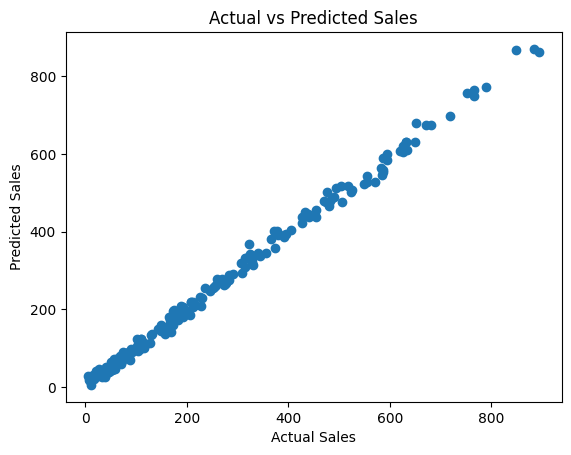

In [9]:
# Plot actual vs predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


In [10]:
# Save the model
joblib.dump(model, 'sales_prediction_model.pkl')

# Load the model (if needed)
model = joblib.load('sales_prediction_model.pkl')
